In [1]:
# 外部ライブラリのインポート
import numpy as np

# 自作パッケージのインポート
from libs.Horcher_Fertility_model import Horcher_Fertility_model

In [36]:
# モデルの定義
model = Horcher_Fertility_model(2,2)
# 外生変数の設定
exog = {
    't_ij': np.array([
        [45, 75],
        [75, 30]
    ])/(60*24),
    'tau_ij': np.array([
        [0.006, 0.010],
        [0.010, 0.005]
    ]),
    'p_i': np.array([1.0, 1.0]), 
    'L_i': np.array([60, 60])
}
# パラメータの設定
param = {    
    'alpha':   0.80,
    'gamma':   9/24,
    'psi':     0.25,
    'L':       1,
    'T':       8/24,
    'N':       100,
    'mu_cost': 0.05,
    'mu_time': 0.1,
    'mu_room': 0.1
}
# 基準均衡時の内生変数の設定
ref = {
    'lambda_ij': np.array([
        [0.30, 0.30],
        [0.05, 0.35]
    ]),
    'n_ij': np.array([
        [1.0, 0.9],
        [0.9, 0.9]
    ]),
    'q_i':   np.array([0.95, 1.1]),
    'Q_j':   np.array([1.5, 1.5]),
    'w_j':   np.array([0.95, 1.05])
}

In [37]:
# 1.外生変数の入力
model.set_exog(exog)

p_i array has been stored.
L_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.


In [38]:
# 2.パラメータの入力
model.set_param(param)

In [39]:
# 3.基準均衡時の内生変数の入力
model.set_ref(ref)

q_i array has been stored.
Q_j array has been stored.
w_j array has been stored.
lambda_ij array has been stored.
n_ij array has been stored.
### Check the setting of reference variables ###
N_R_i: 居住人口
[60. 40.]
N_W_j: 就業人口
[35. 65.]
M_R_i: 労働供給
[60.04633205 41.92368839]
M_W_j: 労働需要
[35.72200772 66.24801272]
v_ij: 時間価値
[[2.58925714 2.69837838]
 [2.43891892 2.95058824]]
mu_ij: 子供の実質費用
n_i: 地域の子供の数
[57. 36.]
delta_ij: 子供の消費性向
[[0.41600165 0.36896635]
 [0.39744681 0.37014354]]
beta_ij: 基本財の消費性向
[[0.46719868 0.50482692]
 [0.48204255 0.50388517]]
theta_ij: 土地の消費性向
[[0.11679967 0.12620673]
 [0.12051064 0.12597129]]
C_ij: 一世帯当たり基本財消費量
[[0.45363657 0.51083027]
 [0.44087351 0.55753412]]
H_R_ij: 一世帯当たり居住地面積
[[0.21937805 0.22442902]
 [0.19019853 0.2167123 ]]
H_R_i: 居住地面積
[13.31421191  8.53592311]
################################################


### Check the regression result ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 17 Jul 2024   Prob (F-statistic):             0.0272
Time:                        16:26:01   Log-Likelihood:                 1.0660
No. Observations:                   4   AIC:                             1.868
Df Residuals:                       2   BIC:                            0.6407
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24

/Users/nagampere/File/horkew/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


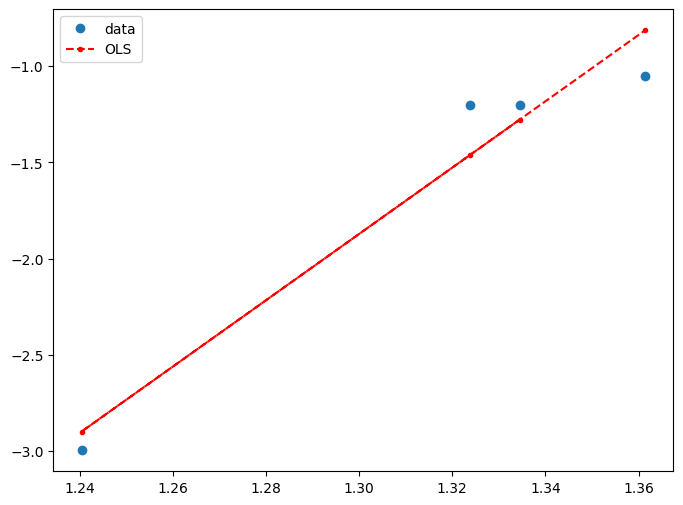

###################################


In [40]:
# 4.フレシェ分布のパラメータ-𝜖の推定
model.estimate_epsilon('OLS')

In [41]:
# 5.基準均衡時の内生変数をもとに、外生変数の推定
model.recover_fundamentals()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00022736969033679397
       x: [ 1.227e+00  7.555e-01  9.165e-01  1.088e+00]
     nit: 7
     jac: [ 3.794e-05 -6.163e-05 -3.075e-05  2.589e-05]
    nfev: 35
    njev: 7
### Check the estimation result ###
utility
[[9.62250327e+09 8.00118425e+09]
 [1.90313581e+09 1.53061470e+10]]
X_i
[1.22733935 0.75546894]
E_j
[0.91650866 1.08827354]
XE
[[1.12486713 1.33568094]
 [0.69239382 0.82215686]]
λ_ij
[[0.30565291 0.30178402]
 [0.03721022 0.35535285]]
Σλ_ij
1.0
###################################
### Check the estimated variables ###
A_j: 就業地の生産レベル(外生変数)
[1.7167978  1.85990903]
xi_i: 地域iにおける商業地の相対地価(外生変数)
[1.57894737 1.36363636]
H_W_j: 商業地面積
[ 5.65598456 11.59340223]
H_i: 床面積
[18.97019646 20.12932534]
q_ave_i:  居住地の平均価格
[1.11398309 1.33037836]
φ_i: 土地賦存量に対する床面積の割合
[0.54212694 0.33772924]
H_ave_i: 仮想的な床面積の最大量(外生変数)
[41.43112596 30.39440456]
#####################################


In [42]:
# 6.現況再現性の確認
model.check_replication('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.464e-09 -1.968e-09]
       x: [ 8.937e-01  9.984e-01]
  method: hybr
    nfev: 15
    fjac: [[-8.107e-01  5.854e-01]
           [-5.854e-01 -8.107e-01]]
       r: [-6.053e+02  3.558e+02 -1.892e+02]
     qtf: [-7.572e-07  2.377e-07]
w_j: 賃金率
[0.8936595  0.99839954]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.26122571 0.29636302]
 [0.03488683 0.40752444]]
v_ij
[[2.43472319 2.56449609]
 [2.29273816 2.80489281]]
mu_ij: 子供のコスト
[[0.41479157 0.42776886]
 [0.4138389  0.46505437]]
n_ij: 一世帯あたり子供の数
[[0.91568477 0.82948951]
 [0.82572118 0.83717063]]
n_i: 地域の子供の数
[48.50304189 36.99742856]
n: 子供の総数
85.50047044663245
q_i: 居住用地価
[1.21319252 1.34565088]
Q_j: 業務用地価
[1.91556714 1.83497847]
q_ave_i: 土地の平均価格
[1.39493333 1.61523897]
N_R_i: 居住人口
[55.75887304 44.24112696]
N_W_j: 勤務人口
[29.6112536 70.3887464]
M_R_i: 労働供給量
[55.70425106 46.544040

In [13]:
# 7.外生変数の再入力
model.change_exog(
    {
        't_ij': np.array([
            [45, 60],
            [60, 15]
        ])/(60*24),
        'tau_ij': np.array([
            [0.006, 0.009],
            [0.009, 0.004]
        ])
    }
)

In [14]:
# 8.新しい外生変数による一般均衡分析と, 内生変数の導出
model.simulate_project('root', 'hybr')

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.336e-11 -2.098e-11]
       x: [ 9.211e-01  9.677e-01]
  method: hybr
    nfev: 12
    fjac: [[-8.409e-01  5.413e-01]
           [-5.413e-01 -8.409e-01]]
       r: [-5.786e+02  5.642e+02 -2.393e+02]
     qtf: [-2.491e-07  1.189e-07]
w_j: 賃金率
[0.92112177 0.96772251]
#######################################
### Calculate the endogenous variables ###
λ_ij: 通勤割合
[[0.49626688 0.33761975]
 [0.0356768  0.13043656]]
v_ij
[[2.51004827 2.55659336]
 [2.43232471 2.80355639]]
mu_ij: 子供のコスト
[[0.40849032 0.41314483]
 [0.44568917 0.48281234]]
n_ij: 一世帯あたり子供の数
[[1.15029139 1.04647181]
 [0.99414545 0.89555007]]
n_i: 地域の子供の数
[92.41610806 15.22804006]
n: 子供の総数
107.64414811637411
q_i: 居住用地価
[1.07485492 1.52456698]
Q_j: 業務用地価
[1.69713935 2.07895497]
q_ave_i: 土地の平均価格
[1.26452919 1.89376138]
N_R_i: 居住人口
[83.38866374 16.61133626]
N_W_j: 勤務人口
[53.19436822 46.80563178]
M_R_i: 労働供給量
[84.80656912 17.797

In [16]:
# 9.一般均衡分析の結果の評価
model.evaluate_res()

In [17]:
# 評価結果の可視化
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
import matplotlib.patheffects as patheffects

# ダミーのポリゴンを作成
polygons = [
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
    Polygon([(1, 0), (1, 1), (2, 1), (2, 0)])
]

# gdfに変換
gdf_change = gpd.GeoDataFrame(
    model.change,
    geometry = polygons
)
gdf_rep = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)
gdf_res = gpd.GeoDataFrame(
    {
        k:((np.sum(v*model.res['lambda_ij'], axis=1)/np.sum(model.res['lambda_ij'], axis=1)) 
            if v.ndim == 2 else v) 
        for k,v in model.res.items() 
    },
    geometry = polygons
)
gdf_diff = gpd.GeoDataFrame(
    {
        k:((np.sum((model.res[k]-v)*model.rep['lambda_ij'], axis=1)/np.sum(model.rep['lambda_ij'], axis=1)) 
            if v.ndim == 2 else model.res[k]-v) 
        for k,v in model.rep.items() 
    },
    geometry = polygons
)

def plot_change(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    norm = Normalize(vmin=-10, vmax=10)
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = 'seismic',
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}%'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/area2_2_HF__{name}_change.png",bbox_inches="tight")
    # 可視化
    plt.show()

def plot_value(gdf:gpd.GeoDataFrame, name:str, dir:str):
    fig, ax = plt.subplots(1, 1)
    # カラーバーの上下端を設定
    top = max(abs(gdf[name]))*1.5
    if min(gdf[name]) < 0 :
        norm = Normalize(vmin=-top, vmax=top)
        cmap = 'seismic'
    else: 
        norm = Normalize(vmin=0, vmax=top)
        cmap = 'Reds'
    gdf.plot(
        column = name,
        ax = ax,
        norm = norm,
        cmap = cmap,
        legend = True,
        legend_kwds={
            "label": name, 
            "format":ticker.FuncFormatter(lambda x, _: f'{int(x)}'),
            "anchor": (0.5,2.5),
            "orientation": "horizontal",
            "shrink": 0.6,
        }
    ).set_axis_off()

    # 数字を各ジオメトリに追加
    for idx, row in gdf.iterrows():
        # ジオメトリの中央にテキストを追加
        plt.text(
            row.geometry.centroid.x, 
            row.geometry.centroid.y, 
            str(round(row[name],3)), 
            fontsize=25, 
            ha='center',
            path_effects=[patheffects.withStroke(
                linewidth=3, 
                foreground='white', 
                capstyle="round"
                )]
        )

    # 保存
    # fig.subplots_adjust(left=0.05, right=0.995, bottom=0.05, top=0.995)
    plt.savefig(f"{dir}/area2_2_HF__{name}_value.png",bbox_inches="tight")
    # 可視化
    plt.show()

In [18]:
gdf_change.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,-0.217173,0.873429,0.873429,0.607280,0.601201,-4.383891,0.002407,-5.301017,-4.383891,-16.308261,-3.881578,-16.262632,-0.100646,-4.494010,-17.167966,-8.749678,-16.444487,-0.641218,-6.971585,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.369292,1.490907,1.490907,2.734602,2.038737,29.897231,0.681964,30.691538,29.897231,28.445326,33.839860,32.170837,0.930136,31.156314,29.748314,30.215283,31.682741,1.419746,24.822937,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [36]:
gdf_rep.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.894340,1.909742,1.209503,2.542757,0.425226,0.237261,0.924318,42.029530,45.470857,24.637272,45.242112,24.971597,0.185104,8.416846,2.923577,11.340423,27.916380,1.390025,0.166811,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.016807,1.705667,1.250822,2.788310,0.453913,0.428547,0.954172,52.030198,54.529143,75.362728,57.166038,77.436553,0.193337,10.542514,11.540652,22.083166,98.422543,1.488524,0.264520,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [37]:
gdf_res.head()

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,0.893283,1.918799,1.215239,2.597460,0.431270,0.243570,0.929766,40.164172,43.198151,20.870144,43.594751,21.266745,0.187271,8.089776,2.475145,10.564921,23.746526,1.380069,0.158792,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1.012125,1.737445,1.274127,2.862022,0.463615,0.445435,0.958989,54.472367,56.801849,79.129856,61.330278,83.658285,0.194564,11.051586,12.183501,23.235087,105.840842,1.517072,0.262900,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


In [58]:
gdf_diff

,w_j,Q_j,q_i,v_ij,mu_ij,lambda_ij,n_ij,n_i,N_R_i,N_W_j,M_R_i,M_W_j,H_R_ij,H_R_i,H_W_j,H_i,Y_j,q_ave_i,phi_i,geometry
0,-0.001057,0.009057,0.005736,0.036774,0.004251,-0.005159,0.003839,-1.865358,-2.272706,-3.767128,-1.647361,-3.704852,0.001286,-0.327070,-0.448432,-0.775502,-4.169853,-0.009957,-0.008019,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,-0.004682,0.031779,0.023304,0.074365,0.009767,0.017374,0.004835,2.442169,2.272706,3.767128,4.164241,6.221732,0.001256,0.509071,0.642849,1.151920,7.418300,0.028548,-0.001620,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 2...."


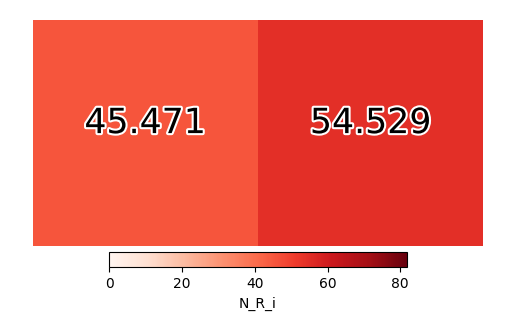

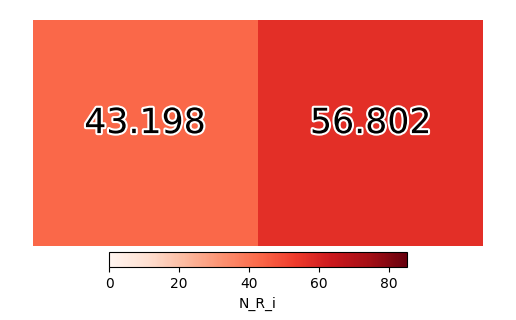

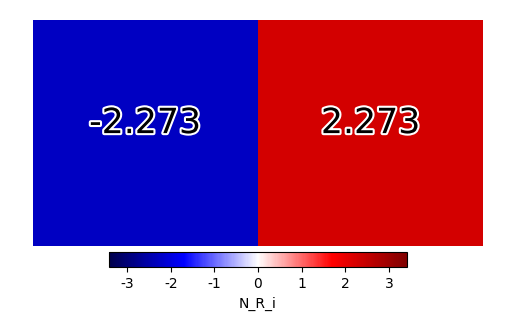

In [64]:
plot_value(gdf_rep, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_value(gdf_res, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_value(gdf_diff, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')

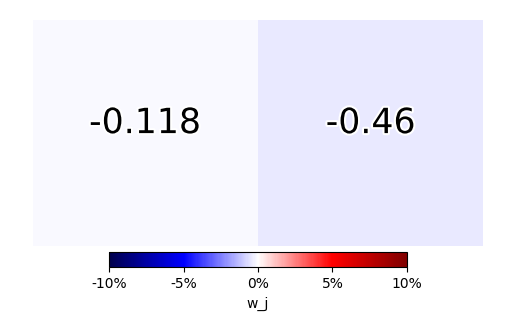

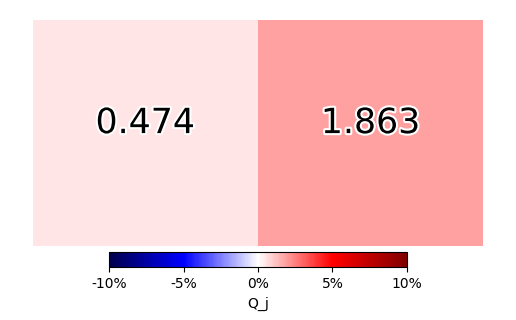

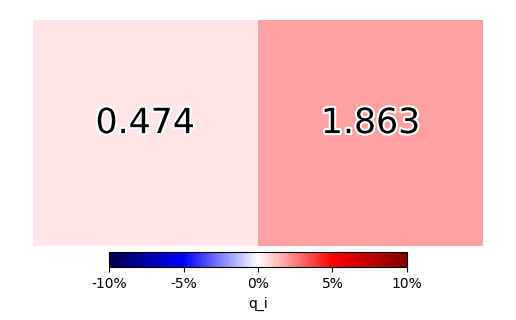

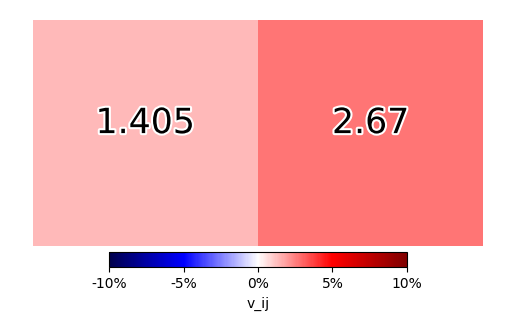

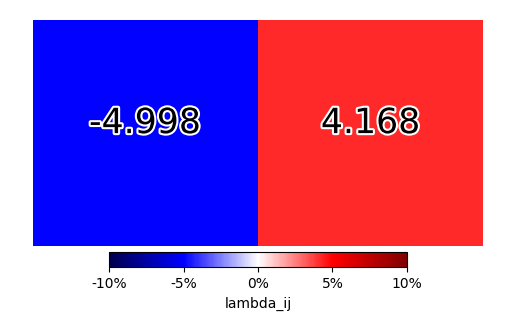

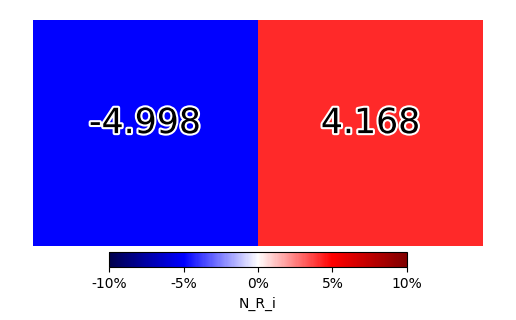

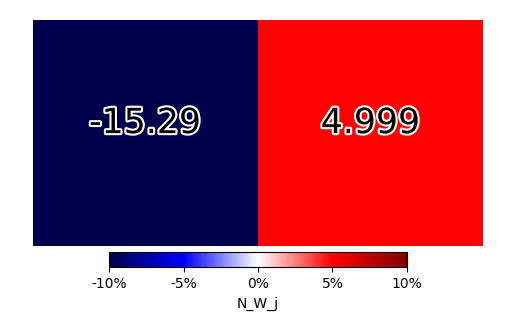

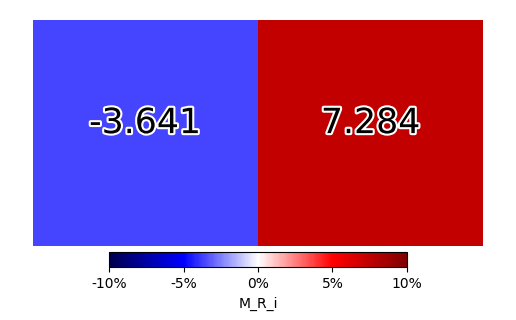

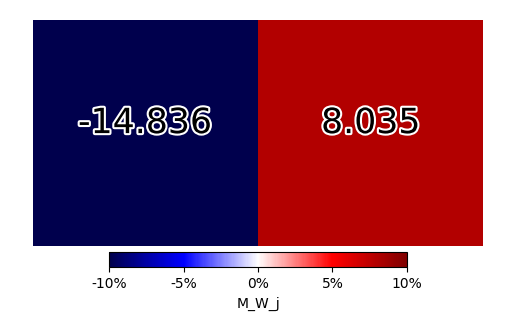

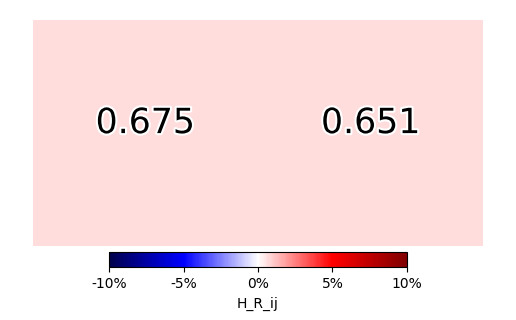

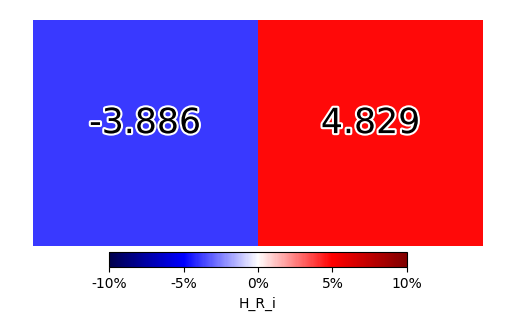

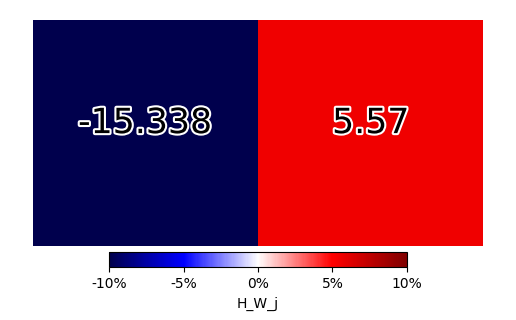

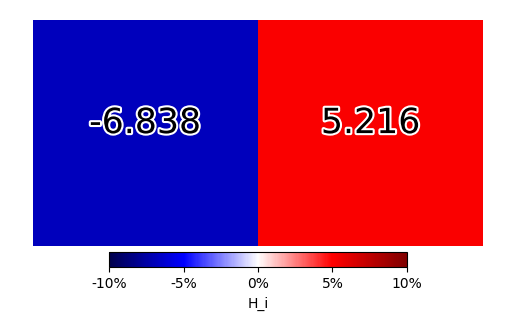

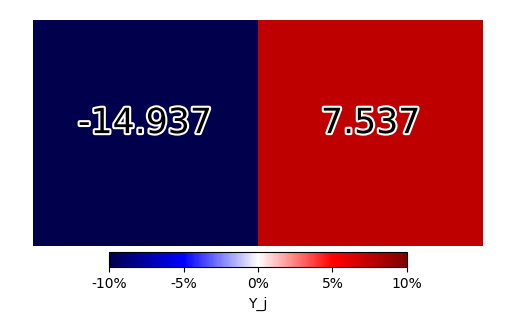

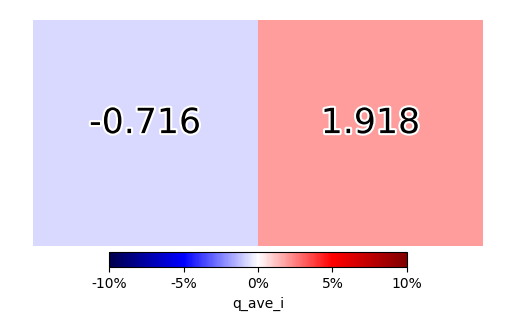

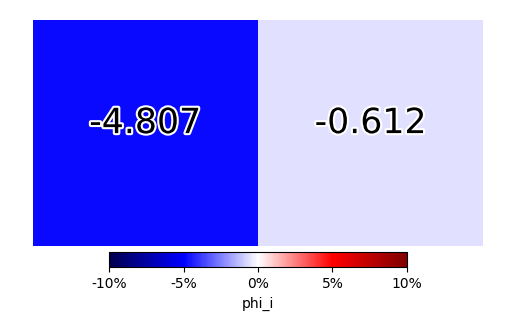

In [14]:
plot_change(gdf_change, 'w_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'Q_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'q_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'v_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'lambda_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'N_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'M_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'M_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'H_R_ij', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'H_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'H_W_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'H_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'Y_j', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'q_ave_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_change, 'phi_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')

In [ ]:
plot_change(gdf_rep, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')
plot_change(gdf_res, 'N_R_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')

In [28]:
print(np.round(model.exog['delta_ij'],3))

[[0.416 0.41 ]
 [0.442 0.411]]


In [27]:
print(np.round(9/24*model.rep['v_ij'],3))
print(np.round(9/24*model.res['v_ij'],3))

[[0.914 0.98 ]
 [0.86  1.071]]
[[0.913 1.003]
 [0.884 1.1  ]]


In [23]:
print(np.round(model.rep['n_ij'],3))
print(np.round(model.res['n_ij'],3))

[[0.917 0.929]
 [0.939 0.956]]
[[0.915 0.937]
 [0.945 0.961]]


In [25]:
print(np.round(model.rep['mu_ij'],3))
print(np.round(model.res['mu_ij'],3))

[[0.415 0.432]
 [0.405 0.461]]
[[0.415 0.439]
 [0.413 0.471]]


In [32]:
print(np.round(model.rep['n_i'],2))
print(np.round(model.res['n_i'],2))

[42.03 52.03]
[40.16 54.47]


In [33]:
print(np.round(np.sum(model.rep['n_i']),2))
print(np.round(np.sum(model.res['n_i']),2))

94.06
94.64


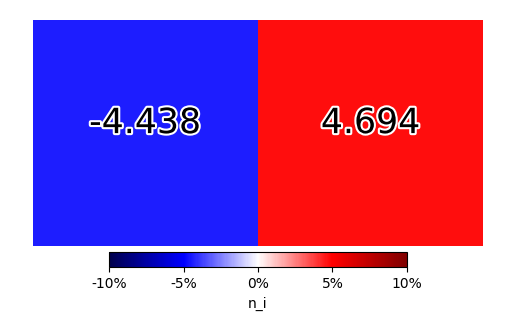

In [19]:
plot_change(gdf, 'n_i', '/Users/nagampere/File/horkew/analysis/master_thesis/images')